<a href="https://colab.research.google.com/github/Arthur2303/Digital-Signal-Processing/blob/main/DFT_by_Matricial_Method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


Student: Arthur Henrique \\
Professor: Edmar Gurjão \\
Course: Digital Signal Processing

#### __Sampling the input signal to use as DFT input__

* $x(t) \rightarrow x[n]$

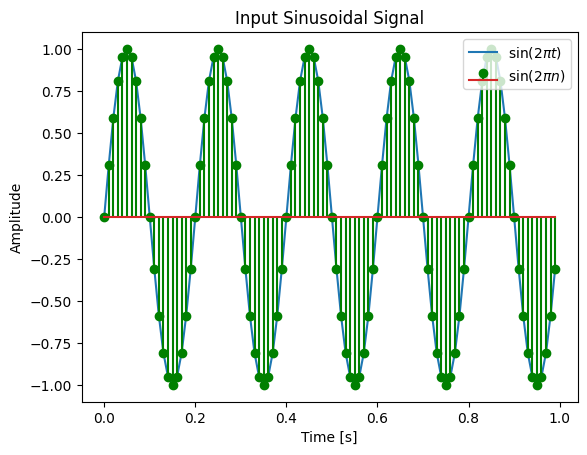

In [ ]:
F  = 5   # Signal frequency [Hz]
Fs = 100  # Sampling frequecy [Hz]
Ts = 1 / Fs  # Sampling period
n = 100 # Number of samples

# time and instants values
time = np.arange(0, 1, Ts)
nTs = np.arange(0, n) * Ts

# input signal and sampled input signal
signal = np.sin(2 * np.pi * F * time)
signal_sampled = np.sin(2 * np.pi * F * nTs)

# Plotting
plt.plot(time, signal, label = r'$\sin(2\pi t)$')
plt.stem(nTs, signal_sampled, 'g', label = r'$\sin(2\pi n)$')
plt.title('Input Sinusoidal Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend(loc = 'upper right')
plt.show()


#### __Implementing the Discrete Fourier Transform (DFT) by Matricial Method__

We must rememeber that DFT is a discrete representation of the frequency spectrum of signals in discrete time. Its expression is given by:

$$X[k] = \sum\limits_{n=0}^{N-1}x(n)W_N^{kn},$$

where $$ W_N = \exp{-j \frac{2\pi}{N}}$$ \\

for a determined $k$ we have

$$X[k] = x(0)e^{-j\frac{2\pi.k.0}{N}} + x(1)e^{-j\frac{2\pi.k.1}{N}} + ... + x(N-1)e^{-j\frac{2\pi.k.(N-1)}{N}}$$ \\

which can be written as

$$X[k] = \begin{bmatrix}1 & e^{-j\frac{2\pi.k}{N}} & ... & e^{-j\frac{2\pi.k.(N-1)}{N}}\end{bmatrix}\begin{bmatrix}x(0) \\ x(1) \\ x(2) \\ ... \\ x(N-1)\end{bmatrix}$$ \\

and extended the expression above for all values of $k$ we get

$${\bf X} = \underbrace{\begin{bmatrix} 1 & 1 & 1 & ... & 1 \\1 & e^{-j\frac{2\pi}{N}} & e^{-j\frac{2\pi.2}{N}} & ... & e^{-j\frac{2\pi.(N-1)}{N}} \\ ... \\ 1 & e^{-j\frac{2\pi(N-1)}{N}} & e^{-j\frac{2\pi.2(N-1)}{N}} & ... & e^{-j\frac{2\pi.(N-1)(N-1)}{N}}\end{bmatrix}}\underbrace{\begin{bmatrix} x(0) \\ x(1) \\ ... \\ X(N-1) \end{bmatrix}}$$ $\hspace{8cm}W\hspace{6.7cm}x$

In [ ]:
def DFT(input_sampled:np.ndarray, N:int):
    """
      Summary: Will represent the input signal (row vector), and performing matrix multiplication to obtain the frequency domain representation. Based on
      the expressions above.
      Parameters:
        - input_sampled: sampled signal that will be represented in the frequency
        -             N: Number of samples. Defines the the size of the matriz
    """

    if (N > len(input_sampled)):
      # Create an array of zeros that will fill the input signal till the size of N
      padding = np.zeros(N-len(input_sampled))

      # Concatenate the original array with the padding array
      input_sampled = np.concatenate((input_sampled, padding))

    # Create the NxN DFT matrix
    W = np.zeros((N, N), dtype=complex)

    # Filling matrix
    for n in range(N):
        for k in range(N):
            W[n, k] = np.exp(-2j * np.pi * n * k / N)

    # Converting the input signal to a column vector
    x = np.reshape(input_sampled, (N, 1))

    # Matrix multiplication
    X = np.dot(W, x)

    return X.round(3)


#### __Testing the implementation__

In [ ]:
# Testing
N = 8
signal_sampled = np.concatenate((np.array([0,1]), np.zeros(2))) # Impulse
# signal_sampled = np.concatenate((np.array([0,1]), np.zeros(5))) # Shifted Impulse
# signal_sampled = np.cos(2 * np.pi * F * nTs) # Cosine
start_time_1 = tempo.time()
frequency_domain = DFT(signal_sampled, N)
end_time_1 = tempo.time()



Tempo de execução: 0.0006165504455566406 segundos


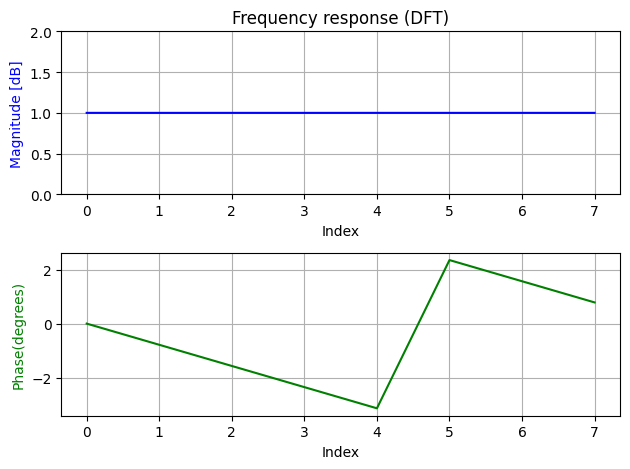

In [ ]:
# Plotting Magnitude and Phase (when complexs)

plt.subplot(2,1,1)
plt.title('Frequency response (DFT)')
plt.plot(np.arange(N), np.abs(frequency_domain), color = 'b')
plt.xlabel('Index')
plt.ylabel('Magnitude [dB]', color='b')
plt.ylim([0,2])
plt.grid(True)
plt.subplot(2,1,2)
plt.plot(np.arange(N), np.angle(frequency_domain), color='g')
plt.xlabel('Index')
plt.ylabel('Phase(degrees)', color='g')
plt.grid(True)

plt.tight_layout()

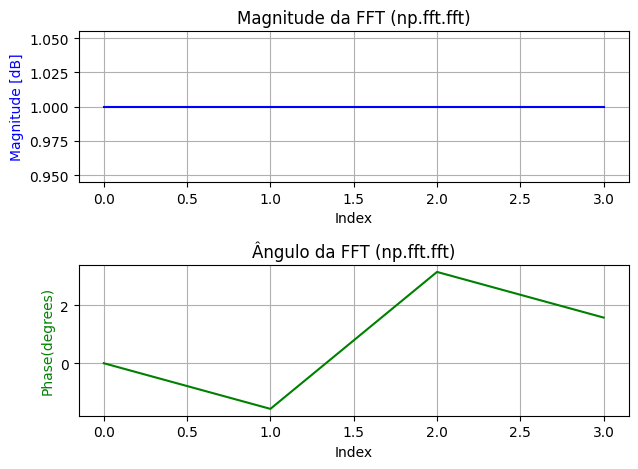

In [ ]:
# Calculando a FFT (Transformada de Fourier Discreta)
fft_resultado = np.fft.fft(signal_sampled)


# Calculando a magnitude e o ângulo
magnitude = np.abs(fft_resultado)
angulo = np.angle(fft_resultado)

# Plotando a magnitude
plt.subplot(2, 1, 1)
plt.plot(magnitude, color='b')
plt.title('Magnitude da FFT (np.fft.fft)')
plt.xlabel('Index')
plt.ylabel('Magnitude [dB]', color='b')
plt.grid(True)

# Plotando o ângulo
plt.subplot(2, 1, 2)
plt.plot(angulo, color='g')
plt.title('Ângulo da FFT (np.fft.fft)')
plt.xlabel('Index')
plt.ylabel('Phase(degrees)', color='g')
plt.grid(True)

plt.tight_layout()